# Project Statement

# Project Statement

- Create a Jupyter notebook
- Create a data set by simulating a real-world phenomenon of my choosing 
- Model and synthesise such data using Python (suggest to use the numpy.random package for this purpose)
- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

# Introduction

A computer simulation is an application designed to imitate a real-life situation with advanages of 

- It can avoid danger and loss of life.
- Conditions can be varied and outcomes investigated.
- Critical situations can be investigated without risk.
- It is cost effective.
- Simulations can be sped up so behaviour can be studied easily over a long period of time.
- Simulations can be slowed down to study behaviour more closely [1]

The project is to simulate a real-world phenomenon.

# The Framingham Heart Study 

The Framingham Heart Study is now considered one of the longest, most important epidemiological studies in medical history. In the 1960s, the study demonstrated the role cigarette smoking plays in the development of heart disease. Those findings helped to fuel the first anti-smoking campaigns of that era. The study provided researchers with knowledge of how dietary fat can increase the risk of heart disease. It showed a link between cholesterol levels in the blood and an individual's risk for developing heart disease. Later, Framingham data also demonstrated the beneficial role of high-density lipoprotein (HDL) cholesterol and the negative consequences of low-density lipoprotein (LDL) cholesterol. This program has helped to educate physicians, patients, and the public about the dangers of high blood cholesterol and to bring about reductions in Americans' blood cholesterol levels. [2]

## Set up

Import the modules required for project

In [216]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

# Investigate the Framingham Heart Data to reporduce real-world dataset
Import the Framingham Heart Data and print out the first 10 rows 

In [217]:
# import data from data folder
# https://github.com/TarekDib03/Analytics/blob/master/Week3%20-%20Logistic%20Regression/Data/framingham.csv
df = pd.read_csv("data/framingham.csv")

# Print first 10 entries
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


## Cleaning up data

To begin the cleanig of data df.describe() will output the count, mean, std, min, max as well as lower, 50 and upper percentiles the lower (25) and upper (75) percentiles. The 50 percentile is the same as the median. [4]

In [218]:
# Print the count, mean, std, min, max as well as lower, 50 and upper percentiles. 
# The lower (25) and upper (75) percentiles. The 50 percentile is the same as the median.
# This is to give an overview of the dataset including missing values
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


The dataframe has 16 rows for the purpose of the project we require a minimum four different variables. To select the variables required for the project a correlation matrix investigates the dependence between multiple variables at the same time. It shows symmetric tabular data where each row and column represent a variable, and the corresponding value is the correlation coefficient denoting the strength of a relationship between these two variables. [5]

Using TenYearCHD (10 year risk of coronary heart disease(CHD)) we are going to identify the variables and the strength of a relationship with the other variables 

In [219]:
# To select the variables required for the project A correlation matrix investigates the dependency 
# between multiple variables at the same time. It shows symmetric tabular data where each row and column 
# represent a variable, and the corresponding value is the correlation coefficient denoting the strength of a 
# relationship between these two variables. 
# https://www.geeksforgeeks.org/sort-correlation-matrix-in-python/
# [9]

print('Get correlation of variables with TenYearCHD')
FHS_correlation = df.corr()['TenYearCHD']
corr_FHS = FHS_correlation.abs().sort_values(ascending=False)[1:]
round(corr_FHS,2)

Get correlation of variables with TenYearCHD


age                0.23
sysBP              0.22
prevalentHyp       0.18
diaBP              0.15
glucose            0.13
diabetes           0.10
male               0.09
BPMeds             0.09
totChol            0.08
BMI                0.08
prevalentStroke    0.06
cigsPerDay         0.06
education          0.05
heartRate          0.02
currentSmoker      0.02
Name: TenYearCHD, dtype: float64

A new dataframe is create using varibales with the highest correlation of 10% and above. This ensure we have selected more than the four variables

'TenYearCHD','age','sysBP','prevalentHyp','diaBP','glucose', 'diabetes'

In [220]:
# Create a new dataframe with variables with the highest correlation
# Cut-off rate is 10% and above

print('New dataframe with values with highest correlation')
High_corr = df[['age','sysBP','prevalentHyp','diaBP','glucose', 'diabetes']] 
High_corr.describe()

New dataframe with values with highest correlation


,age,sysBP,prevalentHyp,diaBP,glucose,diabetes
count,4240.000000,4240.000000,4240.000000,4240.000000,3852.000000,4240.000000
mean,49.580189,132.354599,0.310613,82.897759,81.963655,0.025708
std,8.572942,22.033300,0.462799,11.910394,23.954335,0.158280
min,32.000000,83.500000,0.000000,48.000000,40.000000,0.000000
25%,42.000000,117.000000,0.000000,75.000000,71.000000,0.000000
50%,49.000000,128.000000,0.000000,82.000000,78.000000,0.000000
75%,56.000000,144.000000,1.000000,90.000000,87.000000,0.000000
max,70.000000,295.000000,1.000000,142.500000,394.000000,1.000000


In [221]:
Group1 = High_corr.loc[((High_corr['age'] > 40) & (High_corr['age'] <= 50))]

Count missing values in rows by applying the Pandas isna() function with the sum() function to get the counts of missing values per each column in the dataframe. [6]

In [222]:
# Count missing values in rows
# https://cmdlinetips.com/2020/11/how-to-get-number-of-missing-values-in-each-column-in-pandas/
print('Count Missing values in dataframe')
High_corr.isna().sum()

Count Missing values in dataframe


age               0
sysBP             0
prevalentHyp      0
diaBP             0
glucose         388
diabetes          0
dtype: int64

As the project only requires more one-hundred data points across a decision to drop all rows containing the blank values 

In [223]:
# Drop rows with blank values
# https://statisticsglobe.com/drop-rows-blank-values-from-pandas-dataframe-python
print('Check cleaned data')
High_corr.dropna(inplace = True)                   
High_corr.describe()    

Check cleaned data


,age,sysBP,prevalentHyp,diaBP,glucose,diabetes
count,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000
mean,49.638629,132.452233,0.312825,82.933541,81.963655,0.027259
std,8.597086,22.128090,0.463704,11.968874,23.954335,0.162857
min,32.000000,83.500000,0.000000,48.000000,40.000000,0.000000
25%,42.000000,117.000000,0.000000,75.000000,71.000000,0.000000
50%,49.000000,128.000000,0.000000,82.000000,78.000000,0.000000
75%,57.000000,144.000000,1.000000,90.000000,87.000000,0.000000
max,70.000000,295.000000,1.000000,142.500000,394.000000,1.000000


Check rows are removed

In [224]:
print('Verify missing values are removed from dataframe')
High_corr.isna().sum()

Verify missing values are removed from dataframe


age             0
sysBP           0
prevalentHyp    0
diaBP           0
glucose         0
diabetes        0
dtype: int64

In [225]:
# Rename the rows [9]
High_corr = High_corr.rename(columns = {
                            'age' : 'Age',
                            'sysBP' : 'Systolic Blood Pressure',
                            'prevalentHyp' : 'Hypertensive',
                            'diaBP' : 'Diastolic Blood Pressure',
                            'glucose' : 'Glucose Levels',
                            'diabetes' : 'Diabetes'})

High_corr

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
0,39,106.0,0,70.0,77.0,0
1,46,121.0,0,81.0,76.0,0
2,48,127.5,0,80.0,70.0,0
3,61,150.0,1,95.0,103.0,0
4,46,130.0,0,84.0,85.0,0
...,...,...,...,...,...,...
4234,51,126.5,0,80.0,68.0,0
4235,48,131.0,0,72.0,86.0,0
4237,52,133.5,0,83.0,107.0,0
4238,40,141.0,1,98.0,72.0,0


# Analyse Dataframe

## Get percerntage by age

In [226]:
## Get percerntage by age

# https://blog.softhints.com/pandas-count-percentage-value-column/

s = High_corr['Age']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(2)
df = pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

df.reset_index(inplace=True)
df = df.rename(columns = {'index':'Age'})
df



,Age,counts,per,per100
0,40,175,0.045431,4.54
1,46,169,0.043873,4.39
2,42,167,0.043354,4.34
3,48,157,0.040758,4.08
4,41,153,0.039720,3.97
5,39,152,0.039460,3.95
6,45,148,0.038422,3.84
7,44,148,0.038422,3.84
8,43,140,0.036345,3.63
9,52,134,0.034787,3.48


In [227]:
sum(df['per'])

0.9999999999999996

# Create new data frame

In [228]:
NewFarm = pd.DataFrame(columns=['Age', 'Systolic Blood Pressure', 'Hypertensive', 'Diastolic Blood Pressure', 'Glucose Levels', 'Diabetes'])
NewFarm

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes


# Use Random Choice and values 

Random sample from a Get percerntage by age dataframe and the probabilities associated with each entry in the array

In [229]:
p = df['per']
age = df['Age']

NewFarm['Age'] = np.random.choice(age, 3852, p=p)

NewFarm

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
0,42,NaN,NaN,NaN,NaN,NaN
1,41,NaN,NaN,NaN,NaN,NaN
2,44,NaN,NaN,NaN,NaN,NaN
3,53,NaN,NaN,NaN,NaN,NaN
4,59,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3847,60,NaN,NaN,NaN,NaN,NaN
3848,49,NaN,NaN,NaN,NaN,NaN
3849,44,NaN,NaN,NaN,NaN,NaN
3850,64,NaN,NaN,NaN,NaN,NaN


# Lock age ranges in the High_corr dataframe to get the Mean and Standard deviation for each Group

    Group0 = Less than 40
    Group1 = 40 - 50
    Group2 = 50 - 60
    Group3 = 60 - 70

In [230]:
Group0 = High_corr.loc[(High_corr['Age'] <= 40)]
Group1 = High_corr.loc[((High_corr['Age'] > 40) & (High_corr['Age'] <= 50))]
Group2 = High_corr.loc[((High_corr['Age'] > 50) & (High_corr['Age'] <= 60))]
Group3 = High_corr.loc[((High_corr['Age'] > 60) & (High_corr['Age'] <= 70))]

In [231]:
Group0.describe()

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
count,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000
mean,38.088496,121.005900,0.120944,78.382743,78.430678,0.004425
std,1.707006,14.527058,0.326303,10.187962,12.497340,0.066421
min,32.000000,83.500000,0.000000,53.000000,43.000000,0.000000
25%,37.000000,111.000000,0.000000,72.000000,70.000000,0.000000
50%,38.000000,120.000000,0.000000,78.000000,77.000000,0.000000
75%,40.000000,129.000000,0.000000,85.000000,84.000000,0.000000
max,40.000000,197.500000,1.000000,125.000000,186.000000,1.000000


In [232]:
Group1.describe()

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,45.328071,127.987303,0.240906,82.330130,80.187371,0.017845
std,2.839476,18.282872,0.427780,11.352016,20.812511,0.132433
min,41.000000,90.000000,0.000000,52.000000,40.000000,0.000000
25%,43.000000,115.000000,0.000000,74.000000,71.000000,0.000000
50%,45.000000,126.000000,0.000000,81.000000,77.000000,0.000000
75%,48.000000,137.000000,0.000000,88.000000,85.000000,0.000000
max,50.000000,243.000000,1.000000,142.500000,348.000000,1.000000


In [233]:
Group2.describe()

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
count,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000
mean,55.261643,138.114733,0.407282,85.165961,83.681626,0.036410
std,2.848751,22.442454,0.491536,12.204246,24.808868,0.187387
min,51.000000,83.500000,0.000000,51.000000,40.000000,0.000000
25%,53.000000,123.000000,0.000000,77.000000,72.000000,0.000000
50%,55.000000,134.500000,0.000000,84.000000,79.000000,0.000000
75%,58.000000,150.500000,1.000000,92.000000,88.000000,0.000000
max,60.000000,244.000000,1.000000,140.000000,325.000000,1.000000


In [234]:
Group3.describe()

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,63.576493,146.591418,0.542910,85.411381,87.475746,0.061567
std,2.096220,27.304788,0.498621,13.274108,36.537720,0.240592
min,61.000000,92.500000,0.000000,48.000000,45.000000,0.000000
25%,62.000000,126.000000,0.000000,76.500000,73.750000,0.000000
50%,63.000000,143.500000,1.000000,84.000000,80.000000,0.000000
75%,65.000000,163.000000,1.000000,93.000000,91.000000,0.000000
max,70.000000,295.000000,1.000000,136.000000,394.000000,1.000000


# Results of loc dataframe

## Systolic Blood Pressure	

    Less than 40
    mu, sigma = 121.005900, 14.527058	
    40 - 50
    mu, sigma = 127.987303, 18.282872	
    50 - 60
    mu, sigma = 138.114733, 22.442454	
    60 - 70
    mu, sigma = 146.591418, 27.304788	

## Diastolic Blood Pressure

    Less than 40
    mu, sigma = 78.382743, 10.187962	
    40 - 50
    mu, sigma = 82.330130, 11.352016	
    50 - 60
    mu, sigma = 85.165961, 12.204246	
    60 - 70
    mu, sigma = 85.411381, 13.274108	

## Glucose Levels	

    Less than 40
    mu, sigma = 78.430678, 12.497340	
    40 - 50
    mu, sigma = 80.187371, 20.812511	
    50 - 60
    mu, sigma = 83.681626, 24.808868	
    60 - 70
    mu, sigma = 87.475746, 36.537720	


# Data on Hypertension and diabetic

https://www.webmd.com/hypertension-high-blood-pressure/guide/diastolic-and-systolic-blood-pressure-know-your-numbers

Here’s how to understand your systolic blood pressure number:

    Normal: Below 120
    Elevated: 120-129
    Stage 1 high blood pressure (also called hypertension): 130-139
    Stage 2 hypertension: 140 or more
    Hypertensive crisis: 180 or more. Call 911.

This is what your diastolic blood pressure number means:

    Normal: Lower than 80
    Stage 1 hypertension: 80-89
    Stage 2 hypertension: 90 or more
    Hypertensive crisis: 120 or more.

https://academic.oup.com/aje/article/163/4/342/103626

    glucose categories: normal (≤5.55 mmol/liter (100 mg/dl))
    impaired (5.56–6.99 mmol/liter (101–126 mg/dl))
    diabetic (>6.99 mmol/liter (>126 mg/dl))

# systolic blood pressure
# Normal <= 120
# Elevated 120 - 180
# Hypertensive >= 180

# diastolic blood pressure
# Normal <= 80
# Elevated 80 - 120
# Hypertensive >= 120

# glucose levels
# normal <= 100
# impaired 101 - 126
# diabetic > 126

# Create a function for 'Systolic Blood Pressure' using random.normal the mean and Stanards deviation from group above 

In [235]:

# NewFarm = pd.DataFrame(columns=['Age', 'Systolic Blood Pressure', 'Hypertensive', 'Diastolic Blood Pressure', 'Glucose Levels', 'Diabetes'])

# ## Systolic Blood Pressure	
#   Less than 40
#   mu, sigma = 121.00, 14.52	
#    40 - 50
#    mu, sigma = 127.98, 18.28	
#    50 - 60
#    mu, sigma = 138.11, 22.44	
#    60 - 70
#    mu, sigma = 146.59, 27.30	

def sbp_level(sbp):
    if sbp <= 40:
        return np.random.normal(121.00, 14.52)
    if sbp > 40 <= 50:
        return np.random.normal(127.98, 18.28)
    if sbp > 50 <= 60:
        return np.random.normal(138.11, 22.44)
    if sbp > 60 <= 70:
        return np.random.normal(146.59, 27.30)


NewFarm['Systolic Blood Pressure'] = NewFarm['Age'].apply(sbp_level)

NewFarm


,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
0,42,110.771362,NaN,NaN,NaN,NaN
1,41,136.205988,NaN,NaN,NaN,NaN
2,44,133.974844,NaN,NaN,NaN,NaN
3,53,122.065435,NaN,NaN,NaN,NaN
4,59,162.575586,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3847,60,122.442356,NaN,NaN,NaN,NaN
3848,49,131.408318,NaN,NaN,NaN,NaN
3849,44,127.018311,NaN,NaN,NaN,NaN
3850,64,174.713316,NaN,NaN,NaN,NaN


# Create a function for Diastolic Blood Pressure using random.normal the mean and Stanards deviation from group above 

In [236]:
## Diastolic Blood Pressure
#    Less than 40
#    mu, sigma = 78.38, 10.18	
#    40 - 50
#    mu, sigma = 82.33, 11.35	
#    50 - 60
#    mu, sigma = 85.16, 12.20	
#    60 - 70
#    mu, sigma = 85.41, 13.27	

def dbp_level(dbp):
    if dbp <= 40:
        return np.random.normal(78.38, 10.18)
    if dbp > 40 <= 50:
        return np.random.normal(82.33, 11.35)
    if dbp > 50 <= 60:
        return np.random.normal(85.16, 12.20)
    if dbp > 60 <= 70:
        return np.random.normal(85.41, 13.27)


NewFarm['Diastolic Blood Pressure'] = NewFarm['Age'].apply(dbp_level)

NewFarm


,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
0,42,110.771362,NaN,67.195689,NaN,NaN
1,41,136.205988,NaN,87.655102,NaN,NaN
2,44,133.974844,NaN,82.644688,NaN,NaN
3,53,122.065435,NaN,74.841772,NaN,NaN
4,59,162.575586,NaN,70.355366,NaN,NaN
...,...,...,...,...,...,...
3847,60,122.442356,NaN,76.668518,NaN,NaN
3848,49,131.408318,NaN,74.352447,NaN,NaN
3849,44,127.018311,NaN,70.283606,NaN,NaN
3850,64,174.713316,NaN,102.680286,NaN,NaN


# Create a function for Diastolic Blood Pressure using random.normal the mean and Stanards deviation from group above 

In [237]:
## Glucose Levels	
#    Less than 40
#    mu, sigma = 78.43, 12.49	
#    40 - 50
#    mu, sigma = 80.18, 20.81	
#    50 - 60
#    mu, sigma = 83.68, 24.80	
#    60 - 70
#    mu, sigma = 87.47, 36.53

def gl_level(gl):
    if gl <= 40:
        return np.random.normal(78.43, 12.49)
    if gl > 40 <= 50:
        return np.random.normal(80.18, 20.81)
    if gl > 50 <= 60:
        return np.random.normal(83.68, 24.80)
    if gl > 60 <= 70:
        return np.random.normal(87.47, 36.53)


NewFarm['Glucose Levels'] = NewFarm['Age'].apply(gl_level)

NewFarm

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
0,42,110.771362,NaN,67.195689,74.858686,NaN
1,41,136.205988,NaN,87.655102,64.482952,NaN
2,44,133.974844,NaN,82.644688,84.015131,NaN
3,53,122.065435,NaN,74.841772,95.614175,NaN
4,59,162.575586,NaN,70.355366,69.096906,NaN
...,...,...,...,...,...,...
3847,60,122.442356,NaN,76.668518,91.553600,NaN
3848,49,131.408318,NaN,74.352447,75.201803,NaN
3849,44,127.018311,NaN,70.283606,87.744809,NaN
3850,64,174.713316,NaN,102.680286,74.716583,NaN


# Create a function for Hypertensive

In [238]:
# systolic blood pressure
# Normal <= 120
# Elevated 120 - 180
# Hypertensive >= 180

def Hyper_level(Hyper):
    if Hyper < 180:
        return 0
    if Hyper >= 180:
        return 1

NewFarm['Hypertensive'] = NewFarm['Systolic Blood Pressure'].apply(Hyper_level)

NewFarm

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
0,42,110.771362,0,67.195689,74.858686,NaN
1,41,136.205988,0,87.655102,64.482952,NaN
2,44,133.974844,0,82.644688,84.015131,NaN
3,53,122.065435,0,74.841772,95.614175,NaN
4,59,162.575586,0,70.355366,69.096906,NaN
...,...,...,...,...,...,...
3847,60,122.442356,0,76.668518,91.553600,NaN
3848,49,131.408318,0,74.352447,75.201803,NaN
3849,44,127.018311,0,70.283606,87.744809,NaN
3850,64,174.713316,0,102.680286,74.716583,NaN


# Create a function for glucose levels

In [239]:
# glucose levels
# normal <= 100
# impaired 101 - 126
# diabetic > 126

def Diabetes_level(Diabetic):
    if Diabetic < 126:
        return 0
    if Diabetic >= 126:
        return 1

NewFarm['Diabetes'] = NewFarm['Glucose Levels'].apply(Diabetes_level)

NewFarm

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
0,42,110.771362,0,67.195689,74.858686,0
1,41,136.205988,0,87.655102,64.482952,0
2,44,133.974844,0,82.644688,84.015131,0
3,53,122.065435,0,74.841772,95.614175,0
4,59,162.575586,0,70.355366,69.096906,0
...,...,...,...,...,...,...
3847,60,122.442356,0,76.668518,91.553600,0
3848,49,131.408318,0,74.352447,75.201803,0
3849,44,127.018311,0,70.283606,87.744809,0
3850,64,174.713316,0,102.680286,74.716583,0


In [240]:
NewFarm.describe()

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
count,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000
mean,49.859034,126.865666,0.001817,81.710760,79.555041,0.010125
std,8.598709,17.718003,0.042596,11.271650,19.370673,0.100123
min,32.000000,70.549176,0.000000,34.372607,3.222653,0.000000
25%,42.000000,115.184213,0.000000,74.143013,66.492278,0.000000
50%,49.000000,126.274425,0.000000,81.624967,79.397993,0.000000
75%,57.000000,138.157269,0.000000,89.479056,92.470373,0.000000
max,69.000000,192.476608,1.000000,123.665533,143.382696,1.000000


In [241]:
High_corr.describe()

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
count,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000
mean,49.638629,132.452233,0.312825,82.933541,81.963655,0.027259
std,8.597086,22.128090,0.463704,11.968874,23.954335,0.162857
min,32.000000,83.500000,0.000000,48.000000,40.000000,0.000000
25%,42.000000,117.000000,0.000000,75.000000,71.000000,0.000000
50%,49.000000,128.000000,0.000000,82.000000,78.000000,0.000000
75%,57.000000,144.000000,1.000000,90.000000,87.000000,0.000000
max,70.000000,295.000000,1.000000,142.500000,394.000000,1.000000


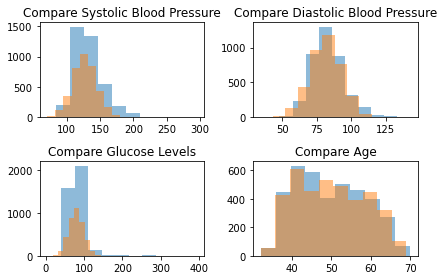

In [247]:
# https://matplotlib.org/stable/gallery/statistics/histogram_multihist.html

# https://stackoverflow.com/questions/43160575/how-to-create-an-array-from-two-columns-in-pandas


HIGHSBP = High_corr['Systolic Blood Pressure']
NewSBP = NewFarm['Systolic Blood Pressure']

HIGHDBP = High_corr['Diastolic Blood Pressure']
NewDBP = NewFarm['Diastolic Blood Pressure']

HIGHGL = High_corr['Glucose Levels']
NewGL = NewFarm['Glucose Levels']

HIGHAge = High_corr['Age']
NewAge = NewFarm['Age']

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

ax0.hist(HIGHSBP, alpha=0.5, label='HIGHSBP')
ax0.hist(NewSBP, alpha=0.5, label='NewSBP')
ax0.set_title('Compare Systolic Blood Pressure')

ax1.hist(HIGHDBP, alpha=0.5, label='HIGHDBP')
ax1.hist(NewDBP, alpha=0.5, label='NewDBP')
ax1.set_title('Compare Diastolic Blood Pressure')

ax2.hist(HIGHGL, alpha=0.5, label='HIGHGL')
ax2.hist(NewGL, alpha=0.5, label='NewGL')
ax2.set_title('Compare Glucose Levels')

ax3.hist(HIGHAge, alpha=0.5, label='HIGHAge')
ax3.hist(NewAge, alpha=0.5, label='NewAge')
ax3.set_title('Compare Age')

plt.savefig('data/Comparedataframes.png')
fig.tight_layout()
plt.show()


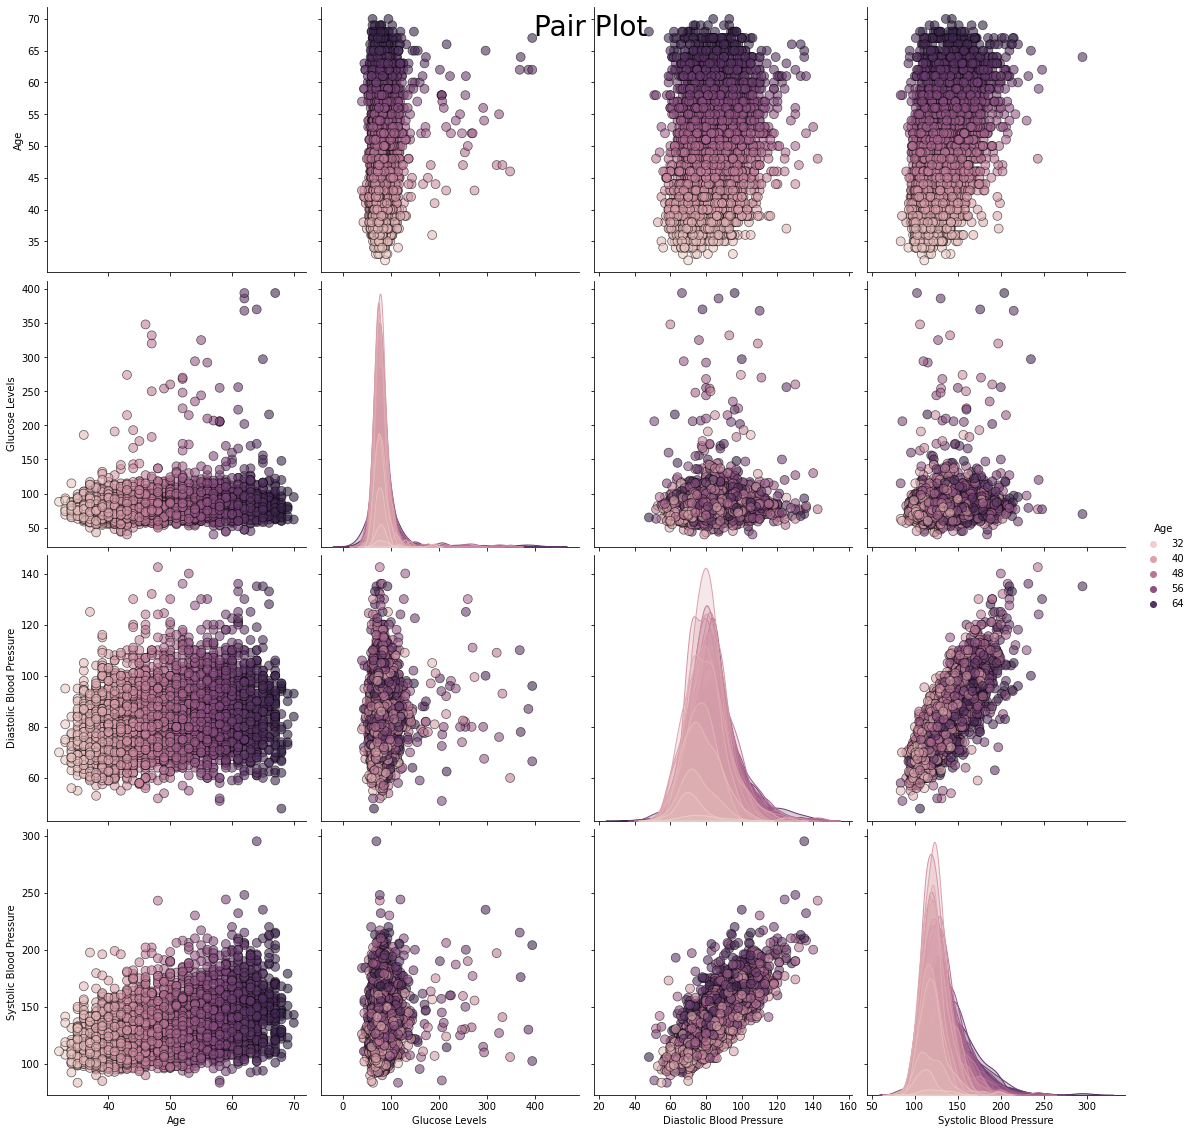

In [250]:
sns.pairplot(High_corr,
             vars = ['Age','Glucose Levels','Diastolic Blood Pressure','Systolic Blood Pressure'], 
             hue='Age', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.suptitle('Pair Plot', size = 28)

plt.savefig('data/High_corr.png')


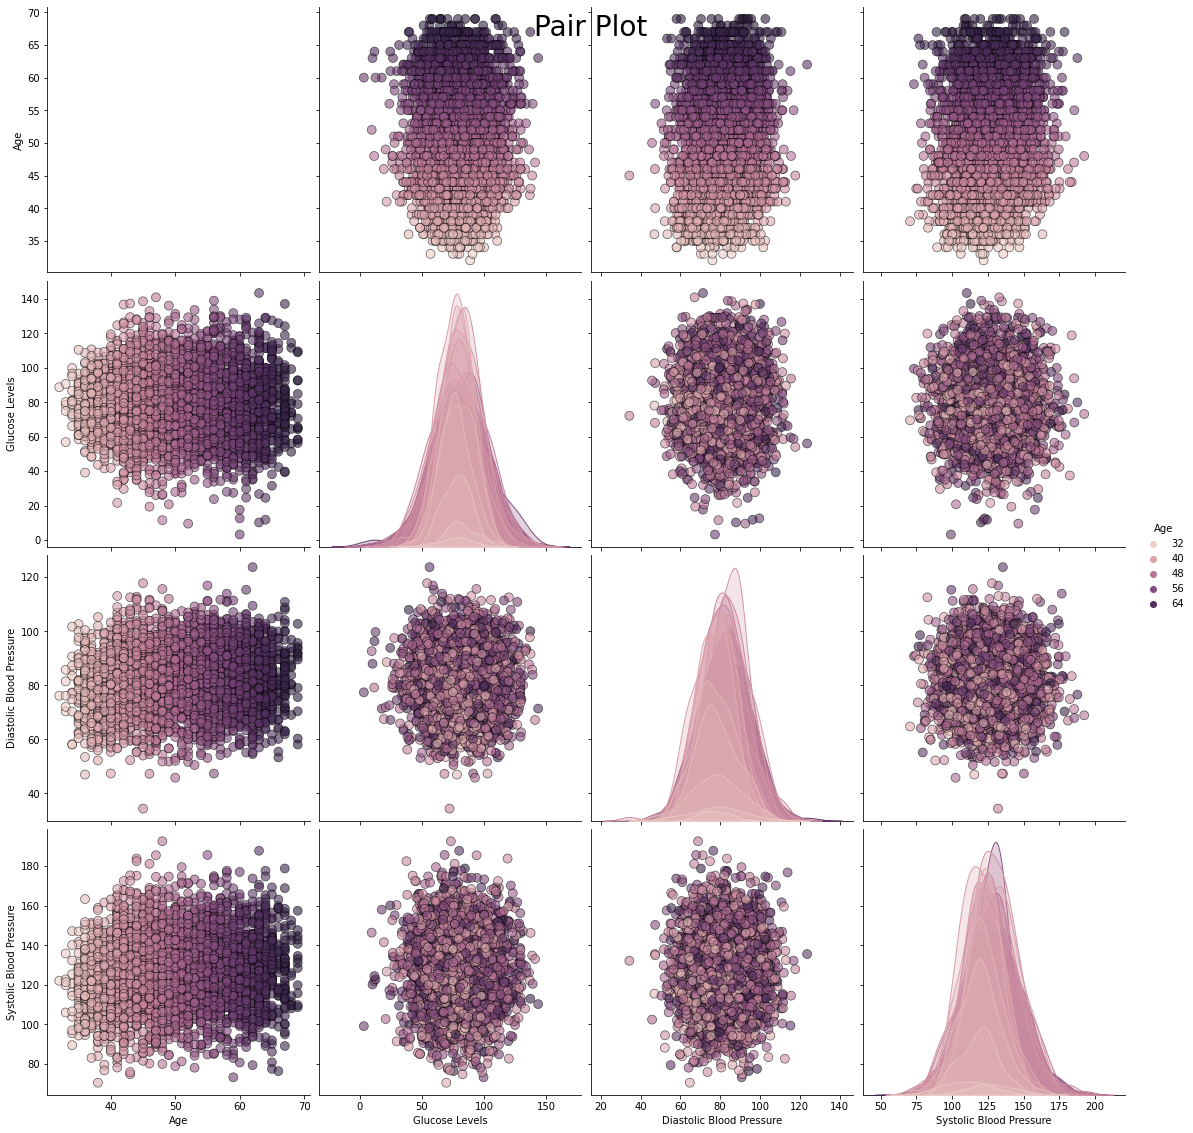

In [244]:
sns.pairplot(NewFarm, 
             vars = ['Age','Glucose Levels','Diastolic Blood Pressure','Systolic Blood Pressure'], 
             hue='Age', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.suptitle('Pair Plot', size = 28)

plt.savefig('data/pairplotNewFarm.png')

# References 

[1] https://www.bbc.co.uk/bitesize/guides/zvxp34j/revision/3

[2] https://nfb.org//sites/default/files/images/nfb/publications/vodold/vspr9804.htm

[3] https://github.com/TarekDib03/Analytics/blob/master/Week3%20-%20Logistic%20Regression/Data/framingham.csv

[4] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

[5] https://www.geeksforgeeks.org/sort-correlation-matrix-in-python/

[6] https://cmdlinetips.com/2020/11/how-to-get-number-of-missing-values-in-each-column-in-pandas/

[7] https://statisticsglobe.com/drop-rows-blank-values-from-pandas-dataframe-python

[8] https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

[9] https://www.kaggle.com/micahshull/python-heart-disease-framingham